# Análisis de índices y sectores

Es posible resumir el rendimiento de distintos segmentos del mercado de acciones mediante la creación de **índices**: portafolios hipotéticos formados por una gran cantidad de activos. El cálculo del valor de los índices se calcula a partir de la evolución de los precios de sus constituyentes. Esto es muy útil para las personas que invierten, ya que les da una idea general de la *salud del mercado* y además permite hacer comparaciones con sus estrategias de inversión (está acción se denomina *benchmarking*).

Los 3 índices de acciones de Estados Unidos más conocidos son:
- Dow Jones Industrial Average (DJIA),
- S&P 500 Index y
- Nasdaq Composite Index.

## El Índice S&P 500
El *Standard and Poor's 500 Index* es un índice compuesto por las 500 empresas públicas con mayor capitalización de mercado de EE.UU. La capitalización de mercado (market cap) es el valor total de mercado que tienen la totalidad de las acciones de una compañía, lo que nos da una idea rápida del tamaño de la misma (solamente necesitamos multiplicar el valor de su acción por la cantidad de acciones existentes). En [este link](https://www.investopedia.com/top-10-s-and-p-500-stocks-by-index-weight-4843111) pueden ver cuáles son las 10 empresas top en el S&P500 al 4 de junio de 2021.

No siempre es posible invertir directamente en un índice, pero existen numerosas compañías que crean Fondos de Inversión que se dedican a seguir estos índices y es posible que las personas inviertan en ellos. Este tipo de instrumentos es muy importante porque le permite a los pequeños inversores diversificar su cartera de inversiones sin tener una cantidad enorme de dinero para comprar acciones de todas las empresas que componen los índices. En EE.UU, estos tipos de fondos son llamados Exchange Traded Funds (ETFs) y son un poco similares a los Fondos Comunes de Inversión locales (FCI). El ETF más conocido para invertir en el S&P500 es el SPDR S&P 500 ETF (su ticker es **SPY**) y lo podemos seguir en nuestro DataReader.

In [1]:
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt

In [ ]:
tickers = ['SPY']

start_date = '2000-01-01'
end_date = '2020-12-31'

data.DataReader(
    tickers,
    start=start_date, 
    end=end_date, 
    data_source='yahoo',
)["Adj Close"].plot(figsize=(16,9))

In [26]:
! pip install yfinance --upgrade --no-cache-dir

  Created wheel for yfinance: filename=yfinance-0.1.60-py2.py3-none-any.whl size=23810 sha256=72eb7fae8ea0faa86ead3f5c68dced79fb9fe1d3e8a44ffa7da39c8d843eb323
  Stored in directory: /private/var/folders/sj/pwh06_hx2h11gj929tbt4r480000gn/T/pip-ephem-wheel-cache-7hao7sr4/wheels/2a/26/37/314a530eb4075da4409fb06b2cb3c293a07d7a6ac3e5f5e633
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8368 sha256=36edb4c7ad7f4b7b688acc52c08a435a1badc9327962682b6e90e658a23eb975
  Stored in directory: /private/var/folders/sj/pwh06_hx2h11gj929tbt4r480000gn/T/pip-ephem-wheel-cache-7hao7sr4/wheels/57/6d/a3/a39b839cc75274d2acfb1c58bfead2f726c6577fe8c4723f13
Successfully built yfinance multitasking


In [33]:
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)

# download dataframe
data_spy = pdr.get_data_yahoo("SPY", start="2000-01-01", end="2020-12-31")

[*********************100%***********************]  1 of 1 completed


In [34]:
data_spy.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,148.25000,148.25000,143.875000,145.4375,97.506668,8164300
2000-01-04,143.53125,144.06250,139.640625,139.7500,93.693573,8089800
2000-01-05,139.93750,141.53125,137.250000,140.0000,93.861176,12177900
2000-01-06,139.62500,141.50000,137.750000,137.7500,92.352676,6227200
2000-01-07,140.31250,145.75000,140.062500,145.7500,97.716209,8066500


In [30]:
# https://finance.yahoo.com/quote/SPY/history?p=SPY descargar un csv

df_spy = pd.read_csv('SPY.csv')

<AxesSubplot:>

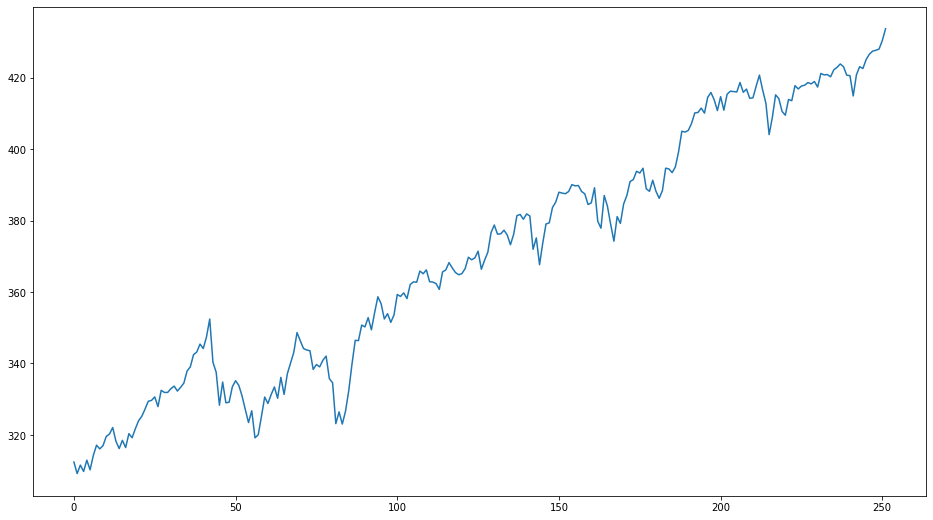

In [3]:
df_spy["Adj Close"].plot(figsize=(16,9))

In [25]:
df_spy.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-07-06,316.369995,317.679993,315.559998,317.049988,312.397003,61713800
1,2020-07-07,315.380005,317.519989,313.369995,313.779999,309.174957,82910000
2,2020-07-08,314.609985,316.299988,312.700012,316.179993,311.539764,54638600
3,2020-07-09,316.839996,317.100006,310.679993,314.380005,309.766174,83354200
4,2020-07-10,314.309998,317.880005,312.760010,317.589996,312.929077,57550400


# Qué acciones componen actualmente al S&P500?

Es posible conseguir la lista de constituyentes del S&P500 desde Wikipedia: https://en.wikipedia.org/wiki/List_of_S%26P_500_companies. Pero también podemos obtener esta tabla directamente con Pandas!

In [9]:
# Podemos usar la función 'read_html' de Pandas, a la cual le mandamos nuestra URL y nos devuelve una lista de DataFrames que Pandas pudo rescatar desde la página.
# Vamos a usarla para obtener nuestra lista de constituyentes.
snp = pd.read_html("COLOCAR URL Y BUSCAR EN LISTA")

In [7]:
df_companies = pd.read_csv('companies.csv')
df_companies.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


## Sectores
Como se puede observar en la tabla, cada compañía que cotiza públicamente en la bolsa puede ser asignada a un sector e incluso a un subsector (GICS Sector, GICS Sub-Industry).

### Ejercicios
- Cuántos distintos sectores existen actualmente entre las empresas del S&P500? Cuántas acciones por sector hay?

- Elijamos 3 sectores existentes y para cada uno de ellos, construyamos un índice con las compañías del S&P500 que pertenezcan a él y que el valor del mismo sea la suma de una acción de cada empresa del sector en el cierre ajustado (Adj Close).

- Graficar todos estos índices en un mismo lugar, junto al S&P500, para todo lo que va del 2021. Es posible que haya que normalizarlos para poder comparar mejor su rendimiento, cómo podemos hacerlo? Podemos calcular su Sharpe Ratio?

### Crear índices y graficar/comparar.

In [12]:
df_companies_2 = df_companies.rename(columns={
    "SEC filings": "sec_filings",
    "GICS Sector": "gics_sector",
    "GICS Sub-Industry": "gics_sub_industry",
    "Headquarters Location": "headquarters_location",
    "Date first added": "date_first_added"
})
df_companies_2.head()


,Symbol,Security,sec_filings,gics_sector,gics_sub_industry,headquarters_location,date_first_added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [14]:
df_companies_2[['gics_sector', 'gics_sub_industry']].nunique()

gics_sector           11
gics_sub_industry    125
dtype: int64

Existen 11 sectores y 125 sub sectores

In [36]:
df_companies_2.groupby('gics_sector').agg({
    'Symbol': 'count'
})

# cantidad de acciones por sector

,Symbol
gics_sector,
Communication Services,26
Consumer Discretionary,63
Consumer Staples,32
Energy,22
Financials,65
Health Care,64
Industrials,74
Information Technology,74
Materials,28


Sectores elegidos: Financials, Information Technology, Industrials

## Sector: Technology

In [37]:
df_it = df_companies_2[df_companies_2['gics_sector'] == 'Information Technology']
df_it

,Symbol,Security,sec_filings,gics_sector,gics_sub_industry,headquarters_location,date_first_added,CIK,Founded
4,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
6,ADBE,Adobe,reports,Information Technology,Application Software,"San Jose, California",1997-05-05,796343,1982
7,AMD,Advanced Micro Devices,reports,Information Technology,Semiconductors,"Santa Clara, California",NaN,2488,1969
13,AKAM,Akamai Technologies,reports,Information Technology,Internet Services & Infrastructure,"Cambridge, Massachusetts",2007-07-12,1086222,1998
38,APH,Amphenol Corp,reports,Information Technology,Electronic Components,"Wallingford, Connecticut",2008-09-30,820313,1932
...,...,...,...,...,...,...,...,...,...
475,V,Visa,reports,Information Technology,Data Processing & Outsourced Services,"San Francisco, California",2009-12-21,1403161,1958
489,WDC,Western Digital,reports,Information Technology,"Technology Hardware, Storage & Peripherals","San Jose, California",2009-07-01,106040,1970
490,WU,Western Union,reports,Information Technology,Data Processing & Outsourced Services,"Englewood, Colorado",2006-09-29,1365135,1851
498,XLNX,Xilinx,reports,Information Technology,Semiconductors,"San Jose, California",1999-11-08,743988,1984


In [58]:
list_it = df_it['Symbol'].tolist()

#creo una lista de mis acciones

In [59]:
string_it = ' '.join(list_it)
string_it

# convierto mi lista en un string

'ACN ADBE AMD AKAM APH ADI ANSS AAPL AMAT ANET ADSK ADP AVGO BR CDNS CDW CSCO CTXS CTSH GLW DXC ENPH FFIV FIS FISV FLT FTNT IT GPN HPE HPQ INTC IBM INTU IPGP JKHY JNPR KEYS KLAC LRCX MA MXIM MCHP MU MSFT MPWR MSI NTAP NLOK NVDA NXPI ORCL PAYX PAYC PYPL PTC QRVO QCOM CRM STX NOW SWKS SNPS TEL TER TXN TRMB TYL VRSN V WDC WU XLNX ZBRA'

In [60]:
data_it = pdr.get_data_yahoo(string_it, start="2021-01-01", end="2021-06-30")
data_it.head()

#busco el listado en. yahoo finance

[*********************100%***********************]  74 of 74 completed


Adj Close                                                  \
                  AAPL         ACN        ADBE         ADI         ADP   
Date                                                                     
2021-01-04  128.997803  254.798035  485.339996  144.784958  167.308167   
2021-01-05  130.592697  256.248596  485.690002  147.372879  166.842773   
2021-01-06  126.196747  259.050293  466.309998  148.037216  166.258530   
2021-01-07  130.502991  261.494385  477.739990  154.293839  167.199249   
2021-01-08  131.629379  262.448151  485.100006  155.414291  169.377731   

                                                                      ...  \
                  ADSK        AKAM       AMAT        AMD        ANET  ...   
Date                                                                  ...   
2021-01-04  296.839996  105.239998  86.554100  92.300003  283.160004  ...   
2021-01-05  301.700012  105.419998  89.274170  92.769997  286.010010  ...   
2021-01-06  302.869995  101.529999  90.499702  90.330002  285.869995  ...   
2021-01-07  315.200012  102.809998  94.216133  95.160004  295.970001  ...   
2021-01-08  319.850006  103.459999  95.212494  94.580002  306.119995  ...   

             Volume                                                       \
                TER     TRMB      TXN     TYL         V    VRSN      WDC   
Date                                                                       
2021-01-04  1391400   924300  4659900  338400  10318300  702300  7498200   
2021-01-05  1083200  1427200  4734100  190300   6869700  755100  3870000   
2021-01-06  1662500  1703800  5254400  403200   7206200  945200  4521100   
2021-01-07  2117800  1175100  5673600  205000  10967900  960100  4404500   
2021-01-08  1340800   989800  4556500  225200   6513000  834600  7544400   

                                      
                 WU     XLNX    ZBRA  
Date                                  
2021-01-04  4101700  2416500  432600  
2021-01-05  4131400  2617500  374700  
2021-01-06  4707000  3342100  419500  
2021-01-07  4131700  2597800  379900  
2021-01-08  4359200  2856600  348500  

[5 rows x 444 columns]

In [46]:
data_it.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close',  'ACN'),
            ('Adj Close', 'ADBE'),
            ('Adj Close',  'ADI'),
            ('Adj Close',  'ADP'),
            ('Adj Close', 'ADSK'),
            ('Adj Close', 'AKAM'),
            ('Adj Close', 'AMAT'),
            ('Adj Close',  'AMD'),
            ('Adj Close', 'ANET'),
            ...
            (   'Volume',  'TER'),
            (   'Volume', 'TRMB'),
            (   'Volume',  'TXN'),
            (   'Volume',  'TYL'),
            (   'Volume',    'V'),
            (   'Volume', 'VRSN'),
            (   'Volume',  'WDC'),
            (   'Volume',   'WU'),
            (   'Volume', 'XLNX'),
            (   'Volume', 'ZBRA')],
           length=444)

In [49]:
selected_columns = ['Adj Close']

df_filtered_it = data_it[selected_columns]
df_filtered_it.head()

Adj Close                                                  \
                  AAPL         ACN        ADBE         ADI         ADP   
Date                                                                     
2021-01-04  128.997803  254.798035  485.339996  144.784958  167.308167   
2021-01-05  130.592697  256.248596  485.690002  147.372879  166.842773   
2021-01-06  126.196747  259.050293  466.309998  148.037216  166.258530   
2021-01-07  130.502991  261.494385  477.739990  154.293839  167.199249   
2021-01-08  131.629379  262.448151  485.100006  155.414291  169.377731   

                                                                      ...  \
                  ADSK        AKAM       AMAT        AMD        ANET  ...   
Date                                                                  ...   
2021-01-04  296.839996  105.239998  86.554100  92.300003  283.160004  ...   
2021-01-05  301.700012  105.419998  89.274170  92.769997  286.010010  ...   
2021-01-06  302.869995  101.529999  90.499702  90.330002  285.869995  ...   
2021-01-07  315.200012  102.809998  94.216133  95.160004  295.970001  ...   
2021-01-08  319.850006  103.459999  95.212494  94.580002  306.119995  ...   

                                                                       \
                   TER       TRMB         TXN         TYL           V   
Date                                                                    
2021-01-04  119.011162  66.290001  160.357162  431.609985  217.107101   
2021-01-05  121.307709  66.849998  161.533493  432.239990  213.866837   
2021-01-06  122.226334  68.410004  162.334198  433.730011  211.982513   
2021-01-07  129.715073  71.839996  166.011490  437.670013  213.168945   
2021-01-08  131.951706  72.320000  169.194504  436.390015  214.804016   

                                                                      
                  VRSN        WDC         WU        XLNX        ZBRA  
Date                                                                  
2021-01-04  213.580002  52.230000  21.361969  142.429993  378.130005  
2021-01-05  206.500000  53.060001  21.685783  144.229996  380.570007  
2021-01-06  199.509995  53.410000  22.686665  141.220001  394.820007  
2021-01-07  200.000000  54.740002  22.431540  149.710007  409.100006  
2021-01-08  202.440002  51.820000  22.833855  147.990005  405.470001  

[5 rows x 74 columns]

In [53]:
df_filtered_it.sum(axis=1)

Date
2021-01-04    13363.160862
2021-01-05    13474.931455
2021-01-06    13396.582466
2021-01-07    13775.485095
2021-01-08    13909.193573
                  ...     
2021-06-23    15078.013719
2021-06-24    15236.088780
2021-06-25    15265.516632
2021-06-28    15444.473342
2021-06-29    15549.963689
Length: 123, dtype: float64

## Sector: Financials

In [54]:
df_fin = df_companies_2[df_companies_2['gics_sector'] == 'Financials']
df_fin

,Symbol,Security,sec_filings,gics_sector,gics_sub_industry,headquarters_location,date_first_added,CIK,Founded
10,AFL,Aflac,reports,Financials,Life & Health Insurance,"Columbus, Georgia",1999-05-28,4977,1955
21,ALL,Allstate Corp,reports,Financials,Property & Casualty Insurance,"Northfield Township, Illinois",1995-07-13,899051,1931
30,AXP,American Express,reports,Financials,Consumer Finance,New York City,1976-06-30,4962,1850
31,AIG,American International Group,reports,Financials,Property & Casualty Insurance,New York City,1980-03-31,5272,1919
34,AMP,Ameriprise Financial,reports,Financials,Asset Management & Custody Banks,"Minneapolis, Minnesota",2005-10-03,820027,1894
...,...,...,...,...,...,...,...,...,...
465,UNM,Unum Group,reports,Financials,Life & Health Insurance,"Chattanooga, Tennessee",1994-03-01,5513,1999
478,WRB,W. R. Berkley Corporation,reports,Financials,Property & Casualty Insurance,"Greenwich, Connecticut",2019-12-05,11544,1967
486,WFC,Wells Fargo,reports,Financials,Diversified Banks,"San Francisco, California",1976-06-30,72971,1852
495,WLTW,Willis Towers Watson,reports,Financials,Insurance Brokers,"London, England",2016-01-05,1140536,2016


In [56]:
list_fin = df_fin['Symbol'].tolist()

string_fin = ' '.join(list_fin)
string_fin

'AFL ALL AXP AIG AMP AON AJG AIZ BAC BK BRK.B BLK COF CBOE SCHW CB CINF C CFG CME CMA DFS RE FITB FRC BEN GL GS HIG HBAN ICE IVZ JPM KEY LNC L MTB MKTX MMC MET MCO MS MSCI NDAQ NTRS PBCT PNC PFG PGR PRU RJF RF SPGI STT SIVB SYF TROW TRV TFC USB UNM WRB WFC WLTW ZION'

In [61]:
data_fin = pdr.get_data_yahoo(string_fin, start="2021-01-01", end="2021-06-30")

df_filtered_fin = data_fin[selected_columns]
df_filtered_fin.head()

[*********************100%***********************]  65 of 65 completed

1 Failed download:
- BRK.B: No data found, symbol may be delisted


Adj Close                                                 \
                  AFL        AIG         AIZ         AJG         ALL   
Date                                                                   
2020-12-31        NaN        NaN         NaN         NaN         NaN   
2021-01-04  42.635391  36.657822  130.862122  119.374916  106.658585   
2021-01-05  42.704494  37.269936  130.901749  118.580673  105.819763   
2021-01-06  44.353050  39.698650  136.646973  121.052757  108.543457   
2021-01-07  44.106262  40.370003  138.023834  121.449883  108.622406   

                                                                      ...  \
                   AMP         AON         AXP        BAC        BEN  ...   
Date                                                                  ...   
2020-12-31         NaN         NaN         NaN        NaN        NaN  ...   
2021-01-04  186.397797  203.659470  116.969841  29.756323  23.906164  ...   
2021-01-05  185.307800  203.410538  117.594131  29.984224  23.847235  ...   
2021-01-06  195.940140  205.879745  121.944321  31.857002  25.074955  ...   
2021-01-07  198.308380  205.660706  120.979752  32.560532  25.035666  ...   

                                                                     \
                  SYF        TFC        TROW         TRV        UNM   
Date                                                                  
2020-12-31        NaN        NaN         NaN         NaN        NaN   
2021-01-04  33.764023  46.431530  143.726685  134.156097  21.619963   
2021-01-05  34.387085  46.746452  145.089111  133.048431  21.796133   
2021-01-06  36.473850  49.206795  147.463638  137.568100  23.234852   
2021-01-07  36.305717  50.673161  150.402588  137.538437  23.019535   

                                                                    
                  USB        WFC        WLTW        WRB       ZION  
Date                                                                
2020-12-31        NaN        NaN         NaN        NaN        NaN  
2021-01-04  45.437511  29.541864  202.529068  64.280899  42.397789  
2021-01-05  45.585293  30.367445  200.838852  63.726578  43.069359  
2021-01-06  48.284744  32.515942  202.529068  65.914146  47.908611  
2021-01-07  49.250248  33.252003  204.070160  65.340034  49.370266  

[5 rows x 65 columns]

In [64]:
df_filtered_fin.sum(axis=1)

Date
2020-12-31       0.000000
2021-01-04    7705.172080
2021-01-05    7697.653006
2021-01-06    7978.863054
2021-01-07    8084.147208
                 ...     
2021-06-23    9368.443231
2021-06-24    9475.322356
2021-06-25    9579.057414
2021-06-28    9493.051983
2021-06-29    9493.881646
Length: 124, dtype: float64

## Sector: Energy

In [55]:
df_en = df_companies_2[df_companies_2['gics_sector'] == 'Energy']
df_en

,Symbol,Security,sec_filings,gics_sector,gics_sub_industry,headquarters_location,date_first_added,CIK,Founded
44,APA,APA Corporation,reports,Energy,Oil & Gas Exploration & Production,"Houston, Texas",1997-07-28,6769,1954
59,BKR,Baker Hughes,reports,Energy,Oil & Gas Equipment & Services,"Houston, Texas",2017-07-07,1701605,2017
80,COG,Cabot Oil & Gas,reports,Energy,Oil & Gas Exploration & Production,"Houston, Texas",2008-06-23,858470,1989
102,CVX,Chevron Corporation,reports,Energy,Integrated Oil & Gas,"San Ramon, California",1957-03-04,93410,1879
122,COP,ConocoPhillips,reports,Energy,Oil & Gas Exploration & Production,"Houston, Texas",1957-03-04,1163165,2002
141,DVN,Devon Energy,reports,Energy,Oil & Gas Exploration & Production,"Oklahoma City, Oklahoma",2000-08-30,1090012,1971
143,FANG,Diamondback Energy,reports,Energy,Oil & Gas Exploration & Production,"Midland, Texas",2018-12-03,1539838,2007
170,EOG,EOG Resources,reports,Energy,Oil & Gas Exploration & Production,"Houston, Texas",2000-11-02,821189,1999
184,XOM,ExxonMobil,reports,Energy,Integrated Oil & Gas,"Irving, Texas",1957-03-04,34088,1999
219,HAL,Halliburton,reports,Energy,Oil & Gas Equipment & Services,"Houston, Texas",1957-03-04,45012,1919


In [57]:
list_en = df_en['Symbol'].tolist()

string_en = ' '.join(list_en)
string_en

'APA BKR COG CVX COP DVN FANG EOG XOM HAL HES KMI MRO MPC NOV OXY OKE PSX PXD SLB VLO WMB'

In [62]:
data_en = pdr.get_data_yahoo(string_en, start="2021-01-01", end="2021-06-30")

df_filtered_en = data_en[selected_columns]
df_filtered_en.head()

[*********************100%***********************]  22 of 22 completed


Adj Close                                                         \
                  APA        BKR        COG        COP        CVX        DVN   
Date                                                                           
2021-01-04  14.727175  20.701706  16.406481  38.907139  82.519173  15.749282   
2021-01-05  16.133085  20.938070  16.564615  41.139114  84.749947  16.950253   
2021-01-06  16.791172  21.824442  16.871002  42.781139  87.477539  17.887592   
2021-01-07  17.060390  22.326719  17.216923  43.951206  87.886673  18.131693   
2021-01-08  16.531925  22.129747  17.068670  43.951206  88.724434  17.682550   

                                                        ...                   \
                  EOG       FANG        HAL        HES  ...       MRO    NOV   
Date                                                    ...                    
2021-01-04  49.274700  48.420391  18.755503  52.468658  ...  6.784930  13.89   
2021-01-05  53.287037  53.100170  20.329254  56.185188  ...  7.400838  14.66   
2021-01-06  54.413658  55.722038  20.737631  59.355167  ...  7.450509  15.02   
2021-01-07  57.931862  56.187046  20.269491  60.776196  ...  7.639255  15.12   
2021-01-08  58.178932  56.157360  20.040401  59.871902  ...  7.500179  15.01   

                                                                               \
                  OKE        OXY        PSX         PXD        SLB        VLO   
Date                                                                            
2021-01-04  35.995651  17.438164  68.363609  112.693184  21.760340  54.199249   
2021-01-05  37.800236  19.196968  70.193031  120.508621  22.930141  55.745575   
2021-01-06  38.232182  19.986433  69.674538  125.483887  24.199081  56.990417   
2021-01-07  39.067280  20.556044  70.300644  131.074844  24.665022  58.031025   
2021-01-08  38.328171  20.066376  69.175606  130.330063  24.625368  56.124863   

                                  
                  WMB        XOM  
Date                              
2021-01-04  19.474216  40.221066  
2021-01-05  20.065224  42.159431  
2021-01-06  20.830627  43.235222  
2021-01-07  20.869385  43.574436  
2021-01-08  20.636854  44.059025  

[5 rows x 22 columns]

In [63]:
df_filtered_en.sum(axis=1)

Date
2021-01-04     801.763515
2021-01-05     844.690548
2021-01-06     870.904898
2021-01-07     890.003415
2021-01-08     882.485163
                 ...     
2021-06-23    1198.265993
2021-06-24    1210.216477
2021-06-25    1219.702776
2021-06-28    1173.670004
2021-06-29    1168.480008
Length: 123, dtype: float64

## Cisnes Negros

Un Cisne Negro (Black Swan) es un evento impredecible que trae consecuencias potencialmente muy severas. Estos eventos tienen como características principales su extrema rareza, impacto severo y la idea de que, mirando al pasado, era obvio que iban a ocurrir.

Un ejemplo famoso de cisne negro en el mercado estadounidense fue la "Burbuja de las DotCom": Una rápida subida de valor en las acciones de las empresas de base tecnológica hizo que el índice Nasdaq subiera su valor de 1000 a más de 5000 en un período de 5 años (1995-2000). En 2001, el índice tardó aproximadamente 7 meses en bajar un 76%, volviendo a una valoración de 1136, con pérdidas del 80% del valor en casos como los de Cisco, Intel y Oracle. El índice tardó luego 15 años en volver al valor de finales del 2000. Para más información, se puede visitar el [siguiente link](https://www.investopedia.com/terms/d/dotcom-bubble.asp).

Para identificar cisnes negros en el mercado financiero, podemos usar los retornos diarios de las acciones y ajustar una distribución de probabilidad normal sobre los mismos. Aquellos retornos que estén por encima o por debajo de 3 o más desviaciones estándar pueden ser considerados cisnes negros.

### Ejercicios
- Cuántos de estos eventos existieron en el S&P500 desde el año 2000 hasta la fecha y cuándo ocurrieron esos eventos? Es posible encontrar algunas noticias relacionadas con esas fechas?

- Supongamos que invertimos U$D 1.000 en el SPY a comienzos del 2000 y que además teníamos una bola de cristal, pudiendo dejar de invertir nuestro dinero justo el día anterior a un cisne negro y reinvertirlo el día después. Cuánto dinero tendríamos hoy?


## Cómo se generan los precios diarios?

Si bien los precios con los que estamos trabajando ahora no parecen ser un volumen muy grande de datos, los mismos son resúmenes generados a partir de datos de transacciones de mercado en tiempo real todos los días, para todos los activos financieros. FINRA cuenta un poco cómo es el proceso del punto de vista del gran volumen manejado en [este link](https://technology.finra.org/articles/how-finra-processes-75-billion-market-events-daily.html).

Por lo general, los mercados de acciones permanecen abiertos durante los días hábiles desde aprox. las 11hs hasta las 17hs y durante todo ese período, para todo activo, se realizan ofertas de compra y venta de los mismos, que se van organizando automáticamente en un libro de órdenes como el de la imagen de abajo.

![order_book](https://wp.fxssi.com/wp-content/uploads/2019/04/en_post-images.jpg)

Básicamente, para cada activo, se listan todas las ofertas de compra y venta y se realiza una operación exitosamente cuando coinciden los precios.

## Timeframes

Cómo vimos en el primer práctico y en sus correcciones, es muy importante establer un marco temporal de análisis que sea consistente con la estrategia de inversión.

Para algotrading un timeframe apropiado será el análisis de milisegundos, y para una estrategia de largo plazo el análisis puede ser mensual. 

### Ejercicios

1) Transformar los índices realizados en el ejercicio anterior a timeframes mensuales. 

2) Para ello en cada fila de datos considerar el Open, Close, High y Low de cada mes. 

3) Graficar los cierres ajustados de estas nuevas series contrastandolas contra las series diarias. 

4) Comentar: ¿Qué información se gana y se pierde con este cambio? ¿Cuándo se imaginan que puede ser útil tomar esta perspectiva?